In [1]:
import fastai_scans
from fastai.basics import *

In [2]:
voxels = (34, 42, 34)

In [3]:
brains_path = '../data/brains_IXI'
targets_path = '../data/targets.csv'
data = (fastai_scans.VolumeItemList.from_paths(Path(brains_path), Path(targets_path))
                                   .split_by_rand_pct(0.2, seed=7)
                                   .label_from_metadata('age_centuries')
                                   .transform(fastai_scans.get_transforms())
                                   .databunch(bs=32)
                                   .normalize())

/home/lfisch/.conda/envs/fastba/lib/python3.6/site-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


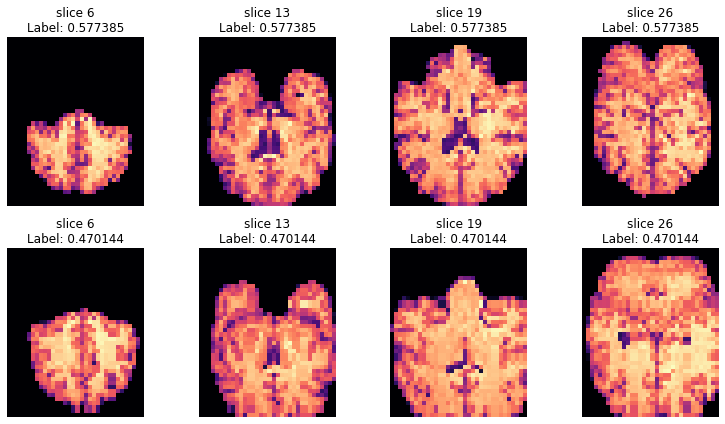

In [4]:
# Show data
data.show_batch(2)

In [5]:
model = fastai_scans.models.ResNet3d(voxels, num_blocks=[1], num_classes=1)
learn = Learner(data, model, metrics=[mean_absolute_error])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.41E-04
Min loss divided by 10: 6.31E-03


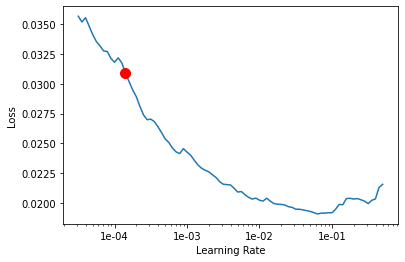

In [6]:
learn.lr_find(start_lr=1e-05, end_lr=1)
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(50, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.022025,0.047641,0.177925,00:00
1,0.018584,0.109535,0.302808,00:00
2,0.016702,0.196449,0.420182,00:00
3,0.015910,0.088340,0.270078,00:00
4,0.014999,0.037577,0.168130,00:00
5,0.014511,0.177528,0.399523,00:00
6,0.014463,0.039169,0.173571,00:00
7,0.014138,0.069596,0.239527,00:00
8,0.014329,0.032526,0.153663,00:00
9,0.014222,0.041597,0.177193,00:00


In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.show_results(rows=2)